# Analysis of Decision Trees

## Experiment-8

10/10/2023

URK21CS7002

### AIM

To categorize the given dataset using Decision Trees

### Description

#### What are decision trees?

Decision trees are a machine learning algorithm that visually represents decision-making. They select the best features to split data into subsets, aiming to classify or predict outcomes. The process continues recursively until stopping criteria, creating a tree structure with internal nodes for decisions and leaves for class labels or values.

#### Write the libraries for decision trees program?

- scikit-learn
- XGBoost
- LightGBM
- C4.5 (CART)
- ID3
- Random Forest
- Weka
- J48 (C4.5 implementation in Weka)
- Orange
- CART (Classification and Regression Trees)

#### What are the pre-processing steps for machine learning algorithm?

Pre-processing is vital in machine learning:

- Data Cleaning: Remove missing values, outliers.
- Data Encoding: Convert categorical data to numerical.
- Feature Scaling: Standardize or normalize numerical features.
- Feature Selection: Choose relevant features.
- Data Split: Divide data into training and testing sets.
- Imbalance Handling: Address class imbalances.
- Dimensionality Reduction: Reduce feature dimensions.
- Data Transformation: Apply log, power transforms, or PCA.
- Handling Text Data: Tokenization and vectorization for NLP tasks.
- Cross-Validation: Validate model performance.

#### Complete the decision tree program for drug.csv and write the classification report.

```
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         6
           3       1.00      0.92      0.96        12
           4       0.97      1.00      0.98        30

    accuracy                           0.97        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.97      0.97      0.97        60
```

# 

### Drug.csv

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [26]:
#Step 1: Import dataset
df = pd.read_csv('Drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [27]:
df['Sex'].replace(['F','M'],[0, 1], inplace=True)
df['BP'].replace(['HIGH', 'NORMAL','LOW'],[0, 1, 2], inplace=True)
df['Cholesterol'].replace(['HIGH', 'NORMAL'],[0, 1], inplace=True)
df['Drug'].replace(['drugA','drugB','drugC','drugX','drugY'],[0, 1, 2, 3, 4], inplace=True)

In [28]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,2,0,13.093,2
2,47,1,2,0,10.114,2
3,28,0,1,0,7.798,3
4,61,0,2,0,18.043,4


In [29]:
X=df.iloc[:,:-1]
y=df['Drug']

In [30]:
y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int64

In [31]:
#Step3: Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [33]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
cm

array([[ 8,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 11,  1],
       [ 0,  0,  0,  0, 30]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         6
           3       1.00      0.92      0.96        12
           4       0.97      1.00      0.98        30

    accuracy                           0.97        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.97      0.97      0.97        60



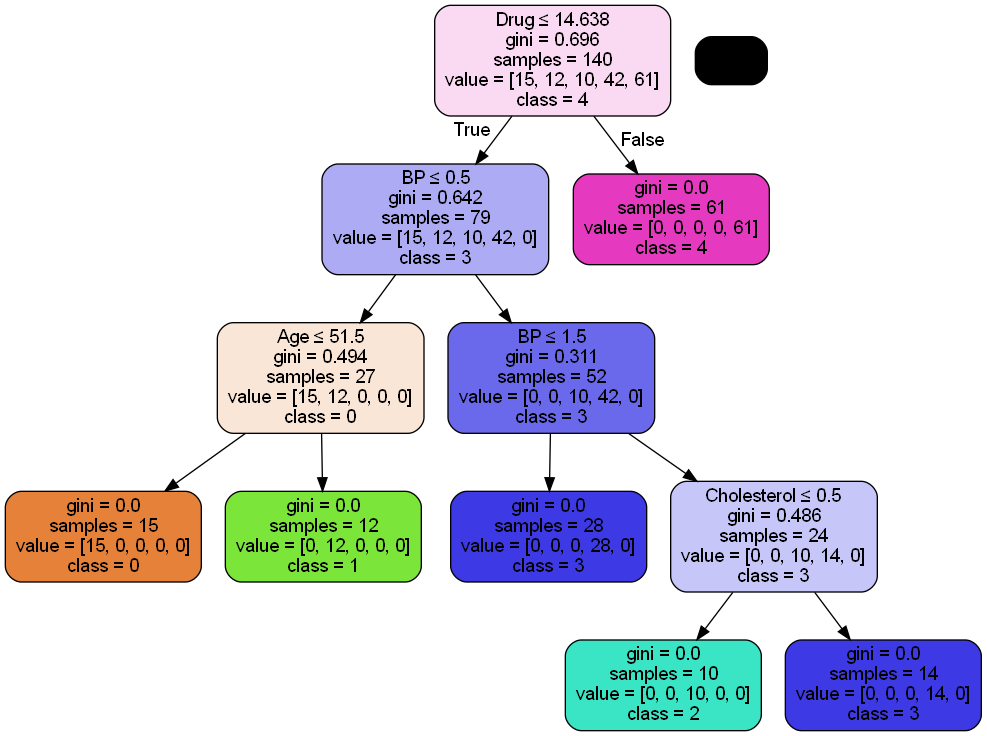

In [36]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Drug']
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 

### Cancer.csv

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [38]:
#Step 1: Import dataset
df = pd.read_csv('Cancer.csv')
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


In [39]:
df['diagnosis'].replace(['M','B'],[0, 1], inplace=True)

In [40]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [41]:
X=df.iloc[:,1:-1]
y=df['diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [43]:
#Step3: Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [45]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
cm

array([[60,  5],
       [14, 92]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        65
           1       0.95      0.87      0.91       106

    accuracy                           0.89       171
   macro avg       0.88      0.90      0.88       171
weighted avg       0.90      0.89      0.89       171



In [48]:
# !conda install python-graphviz
# !pip install pydotplus 

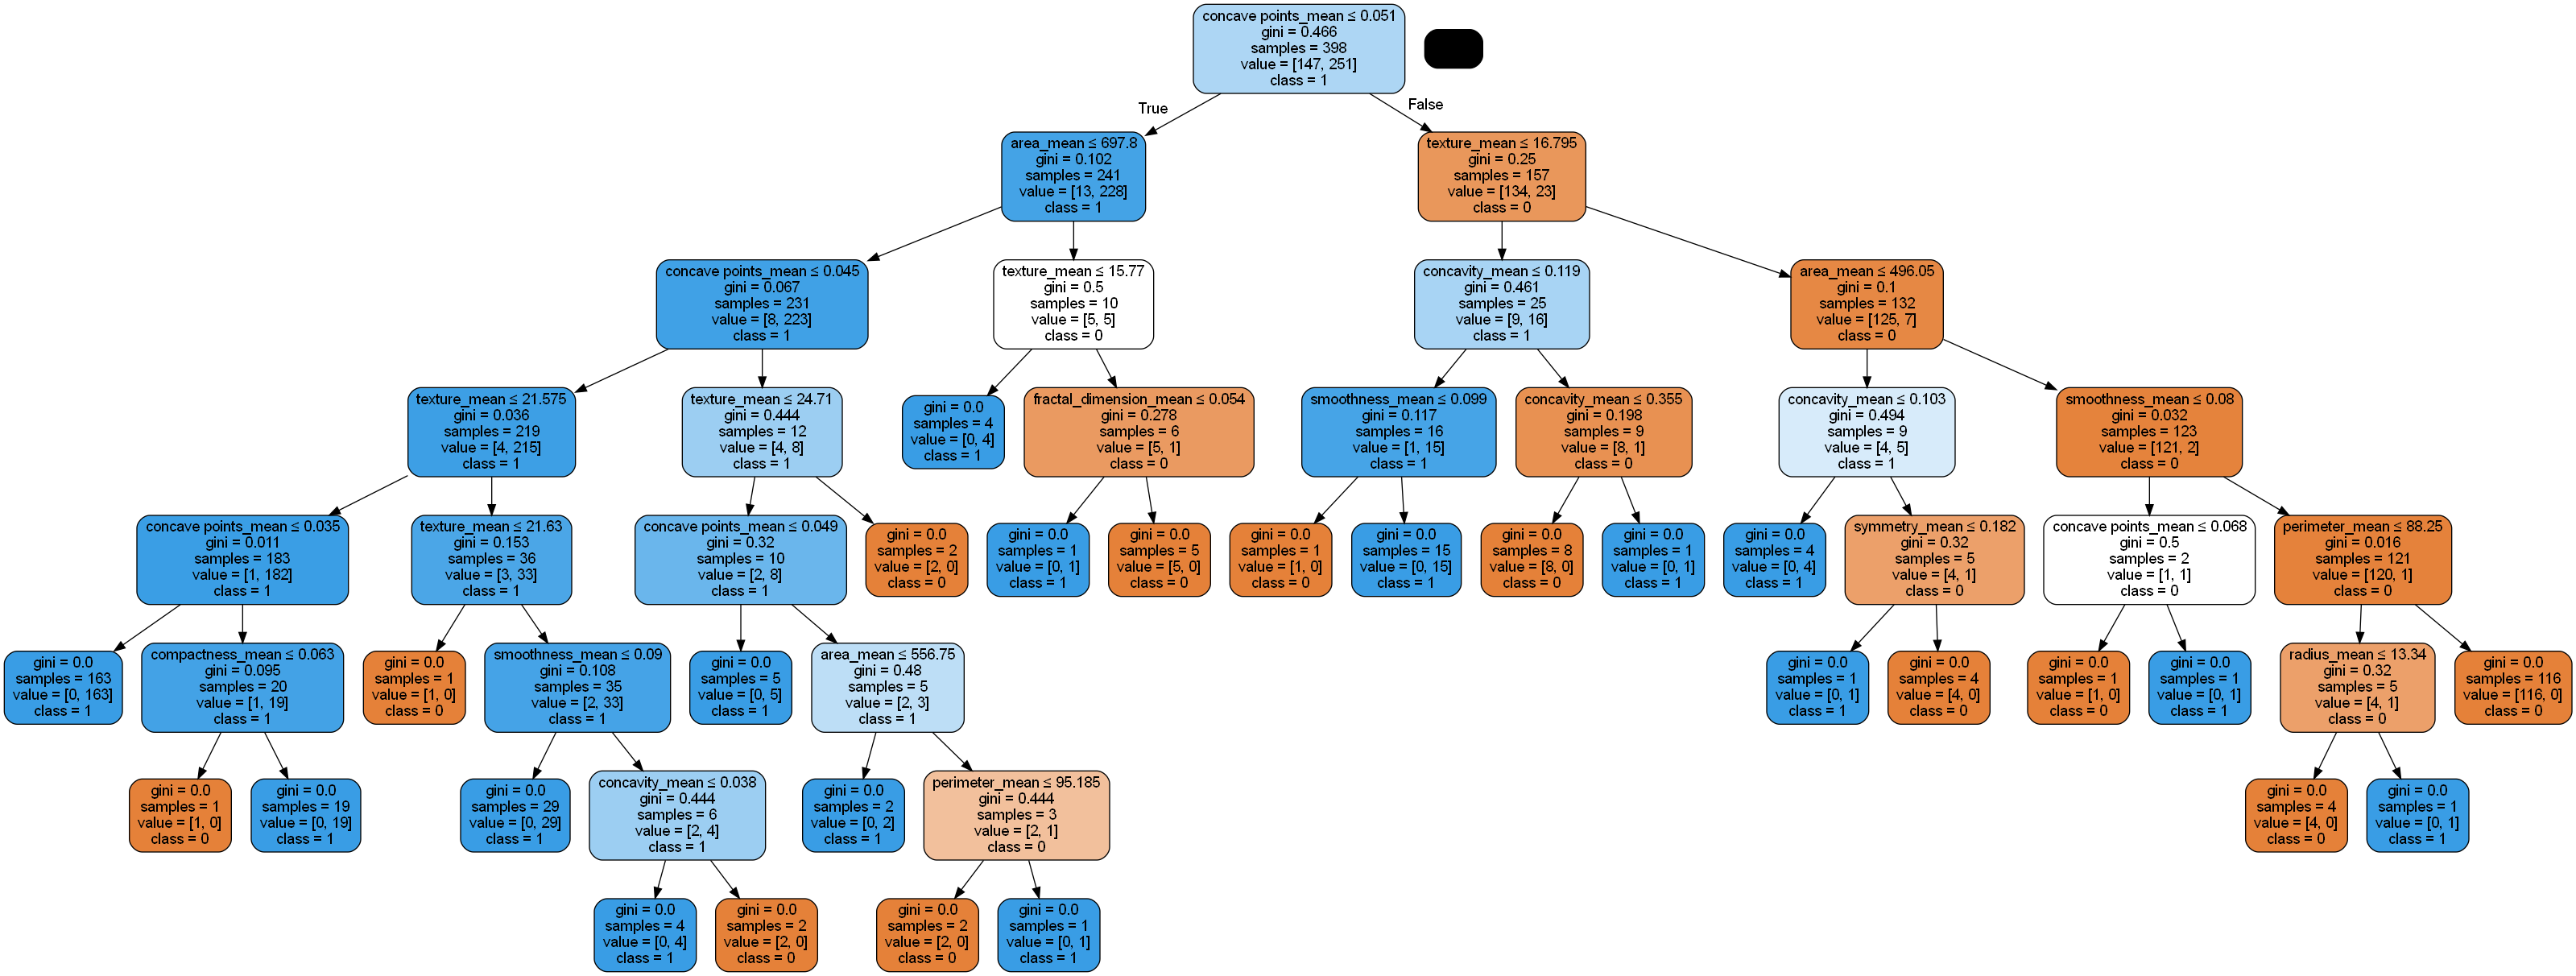

In [49]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 

### Social_Network.csv

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [51]:
#Step 1: Import dataset
df = pd.read_csv('Social_Network.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No


In [52]:
df['Purchased'].replace(['Yes', 'No'],[1, 0], inplace=True)

In [53]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,0
1,15603246,0,27,57000,0
2,15598044,0,27,84000,0
3,15727311,0,35,65000,0
4,15570769,0,26,80000,0


In [57]:
X=df.iloc[:,1:-1]
y=df['Purchased']

In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [59]:
#Step3: Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [61]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
cm

array([[67, 13],
       [ 7, 33]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        80
           1       0.72      0.82      0.77        40

    accuracy                           0.83       120
   macro avg       0.81      0.83      0.82       120
weighted avg       0.84      0.83      0.84       120



In [ ]:
# !conda install python-graphviz
# !pip install pydotplus

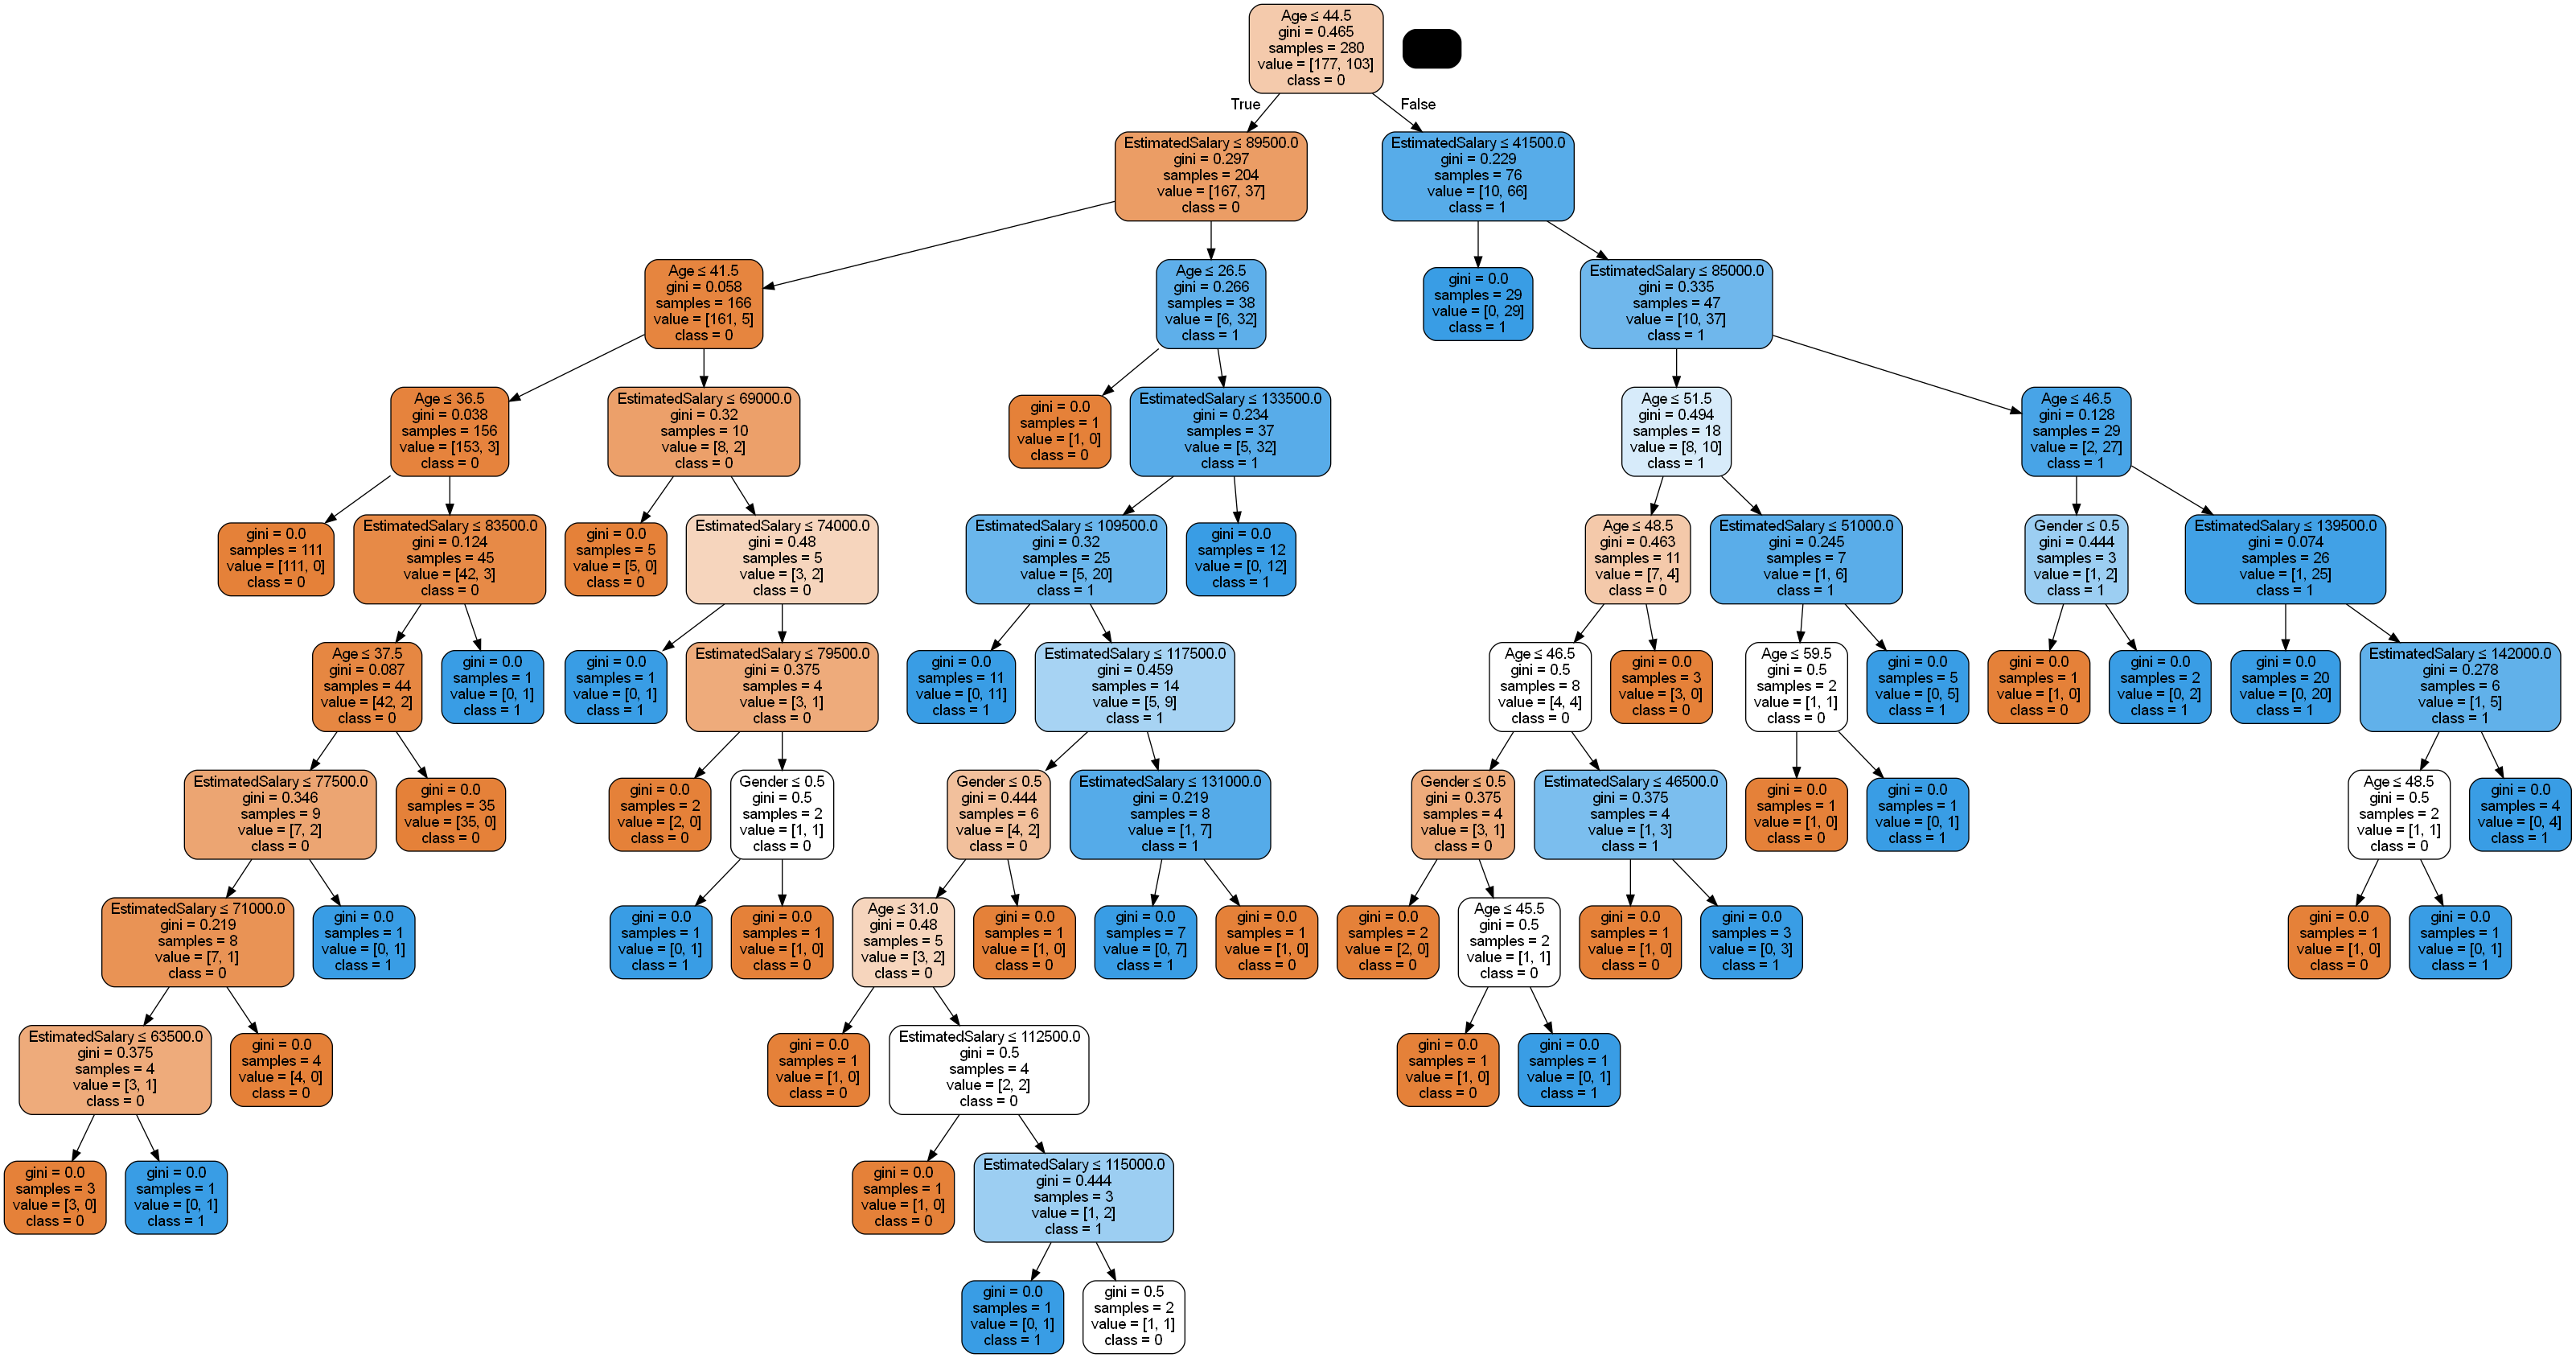

In [64]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Result

Classification using Decision Trees was done on the given datasets.